# Neural Machine Translation with Attention
## English to Portuguese Translation

This notebook demonstrates training and inference for a neural machine translation model using LSTM with attention mechanism.


## 1. Setup and Imports


In [1]:
import sys
import os

# Add parent directory (project root) to Python path
sys.path.append('..')

print(f"Current directory: {os.getcwd()}")
print("✅ Path configured")


Current directory: c:\Users\aa561\Documents\Courses\NLP\NLP with Attention models\Week1\Neural-Machine-Translation-with-Attention\notebooks
✅ Path configured


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from models.translator import Translator
from utils.data_loader import prepare_datasets, MAX_VOCAB_SIZE
from utils.metrics import masked_loss, masked_acc
import inference

print(f"✅ TensorFlow version: {tf.__version__}")
print(f"✅ NumPy version: {np.__version__}")
print("✅ All imports successful!")


c:\ProgramData\anaconda3\envs\tf-gpu\lib\site-packages\numpy\_core\_dtype.py:106: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if dtype.type == np.bool:


✅ TensorFlow version: 2.17.0
✅ NumPy version: 1.25.2
✅ All imports successful!


## 2. Configuration


In [3]:
UNITS = 256
EPOCHS = 20
STEPS_PER_EPOCH = 500

print(f"Vocabulary Size: {MAX_VOCAB_SIZE}")
print(f"LSTM Units: {UNITS}")
print(f"Training Epochs: {EPOCHS}")
print(f"Steps per Epoch: {STEPS_PER_EPOCH}")


Vocabulary Size: 12000
LSTM Units: 256
Training Epochs: 20
Steps per Epoch: 500


## 3. Load and Explore Data


In [4]:
print("Loading data...")
train_data, val_data, english_vectorizer, portuguese_vectorizer = prepare_datasets()

# Initialize inference module
inference.initialize_vectorizers()

print(f"\n✅ Data loaded successfully!")
print(f"English vocabulary size: {english_vectorizer.vocabulary_size()}")
print(f"Portuguese vocabulary size: {portuguese_vectorizer.vocabulary_size()}")


Loading data...
Loading data from: C:\Users\aa561\Documents\Courses\NLP\NLP with Attention models\Week1\Neural-Machine-Translation-with-Attention\data\por-eng\por.txt


c:\ProgramData\anaconda3\envs\tf-gpu\lib\site-packages\numpy\_core\_dtype.py:106: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if dtype.type == np.bool:


Initializing vectorizers...
Loading data from: C:\Users\aa561\Documents\Courses\NLP\NLP with Attention models\Week1\Neural-Machine-Translation-with-Attention\data\por-eng\por.txt
✅ Vectorizers initialized!

✅ Data loaded successfully!
English vocabulary size: 12000
Portuguese vocabulary size: 12000


In [5]:
print("First 10 English words:")
print(english_vectorizer.get_vocabulary()[:10])

print("\nFirst 10 Portuguese words:")
print(portuguese_vectorizer.get_vocabulary()[:10])


First 10 English words:
['', '[UNK]', '[SOS]', '[EOS]', '.', 'tom', 'i', 'to', 'you', 'the']

First 10 Portuguese words:
['', '[UNK]', '[SOS]', '[EOS]', '.', 'tom', 'que', 'no', 'o', 'eu']


In [6]:
for (context, target_in), target_out in train_data.take(1):
    print(f"Batch size: {context.shape[0]}")
    print(f"Context shape (English): {context.shape}")
    print(f"Target input shape (Portuguese): {target_in.shape}")
    print(f"Target output shape (Portuguese): {target_out.shape}")
    
    print(f"\nFirst example:")
    print(f"English tokens: {context[0].numpy()}")
    print(f"Portuguese input tokens: {target_in[0].numpy()}")
    print(f"Portuguese output tokens: {target_out[0].numpy()}")


Batch size: 64
Context shape (English): (64, 13)
Target input shape (Portuguese): (64, 12)
Target output shape (Portuguese): (64, 12)

First example:
English tokens: [  2  13 300  59 130   8   7   9 952   4   3   0   0]
Portuguese input tokens: [   2  240  245   46   58  286    7 1023    4    0    0    0]
Portuguese output tokens: [ 240  245   46   58  286    7 1023    4    3    0    0    0]


## 4. Build Model


In [7]:
translator = Translator(MAX_VOCAB_SIZE, UNITS)

translator.compile(
    optimizer="adam",
    loss=masked_loss,
    metrics=[masked_acc, masked_loss]
)

print("✅ Model created and compiled successfully!")


✅ Model created and compiled successfully!


## 5. Train Model


In [8]:
history = translator.fit(
    train_data.repeat(),
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=val_data,
    validation_steps=50,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

print("\n✅ Training complete!")


Epoch 1/20


c:\ProgramData\anaconda3\envs\tf-gpu\lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'cross_attention' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\ProgramData\anaconda3\envs\tf-gpu\lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'decoder' (of type Decoder) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 109s 208ms/step - loss: 5.1243 - masked_acc: 0.2312 - masked_loss: 5.1243 - val_loss: 4.2676 - val_masked_acc: 0.3573 - val_masked_loss: 4.2676
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 101s 201ms/step - loss: 3.6539 - masked_acc: 0.4290 - masked_loss: 3.6539 - val_loss: 3.0066 - val_masked_acc: 0.5107 - val_masked_loss: 3.0066
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 200ms/step - loss: 2.7098 - masked_acc: 0.5522 - masked_loss: 2.7098 - val_loss: 2.3935 - val_masked_acc: 0.5876 - val_masked_loss: 2.3935
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 99s 198ms/step - loss: 2.2268 - masked_acc: 0.6175 - masked_loss: 2.2268 - val_loss: 1.9967 - val_masked_acc: 0.6510 - val_masked_loss: 1.9967
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 100s 201ms/step - loss: 1.9034 - masked_acc: 0.6632 - masked_loss: 1.9034 - val_loss: 1.7489 - val_masked_acc: 0.6814 - val_masked_loss: 1.7489
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 102s 204ms/step - loss: 1.6561 - masked_acc: 0.6943 

## 6. Visualize Training


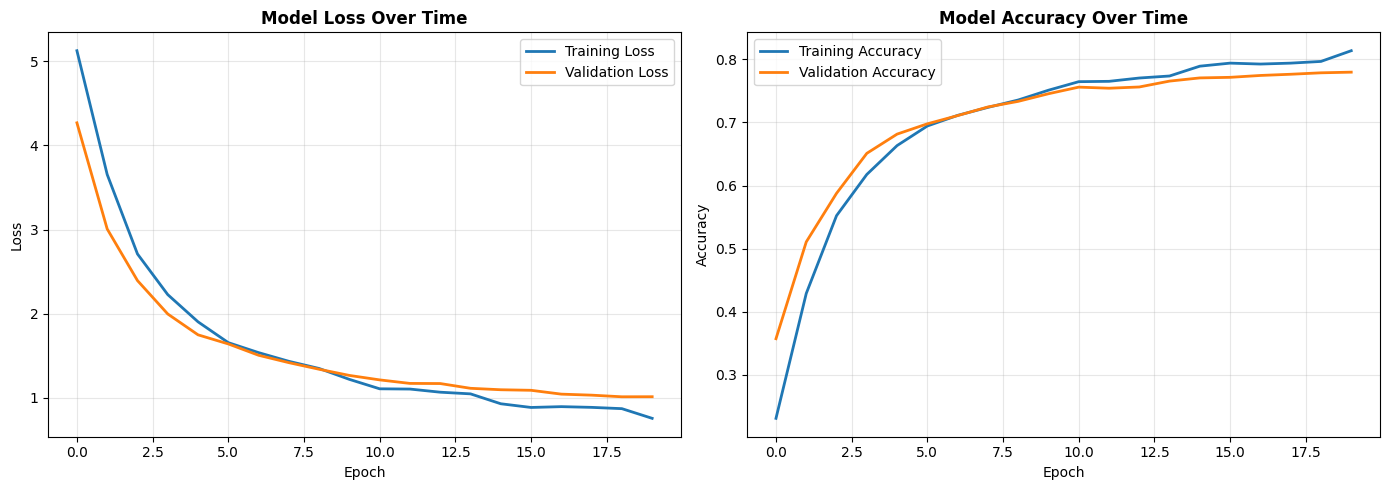


Final Training Loss: 0.7567
Final Training Accuracy: 0.8135
Final Validation Loss: 1.0135
Final Validation Accuracy: 0.7795


In [9]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Time', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['masked_acc'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_masked_acc'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['masked_acc'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_masked_acc'][-1]:.4f}")


## 7. Save Model


In [ ]:
translator.save('models/nmt_model.keras')
print("✅ Model saved successfully to 'models/nmt_model.keras'")